In [1]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv(r"D:\data science\data set\cardiovascular\CVD_cleaned.csv")
data

In [3]:
data.shape

(308854, 19)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308854.0,5.096366,8.199763,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308854.0,29.835200,24.875735,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308854.0,15.110441,14.926238,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308854.0,6.296616,8.582954,0.00,2.00,4.00,8.00,128.00


In [6]:
columns=data.columns
columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [7]:
General_Health=data['General_Health'].value_counts()
General_Health

General_Health
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: count, dtype: int64

In [8]:
Arthritis=data['Arthritis'].value_counts()
Arthritis

Arthritis
No     207783
Yes    101071
Name: count, dtype: int64

In [9]:
Sex=data['Sex'].value_counts()
Sex

Sex
Female    160196
Male      148658
Name: count, dtype: int64

In [10]:
Age_Category=data['Age_Category'].value_counts()
Age_Category

Age_Category
65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    15494
Name: count, dtype: int64

In [11]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [12]:
data.duplicated().sum()

80

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

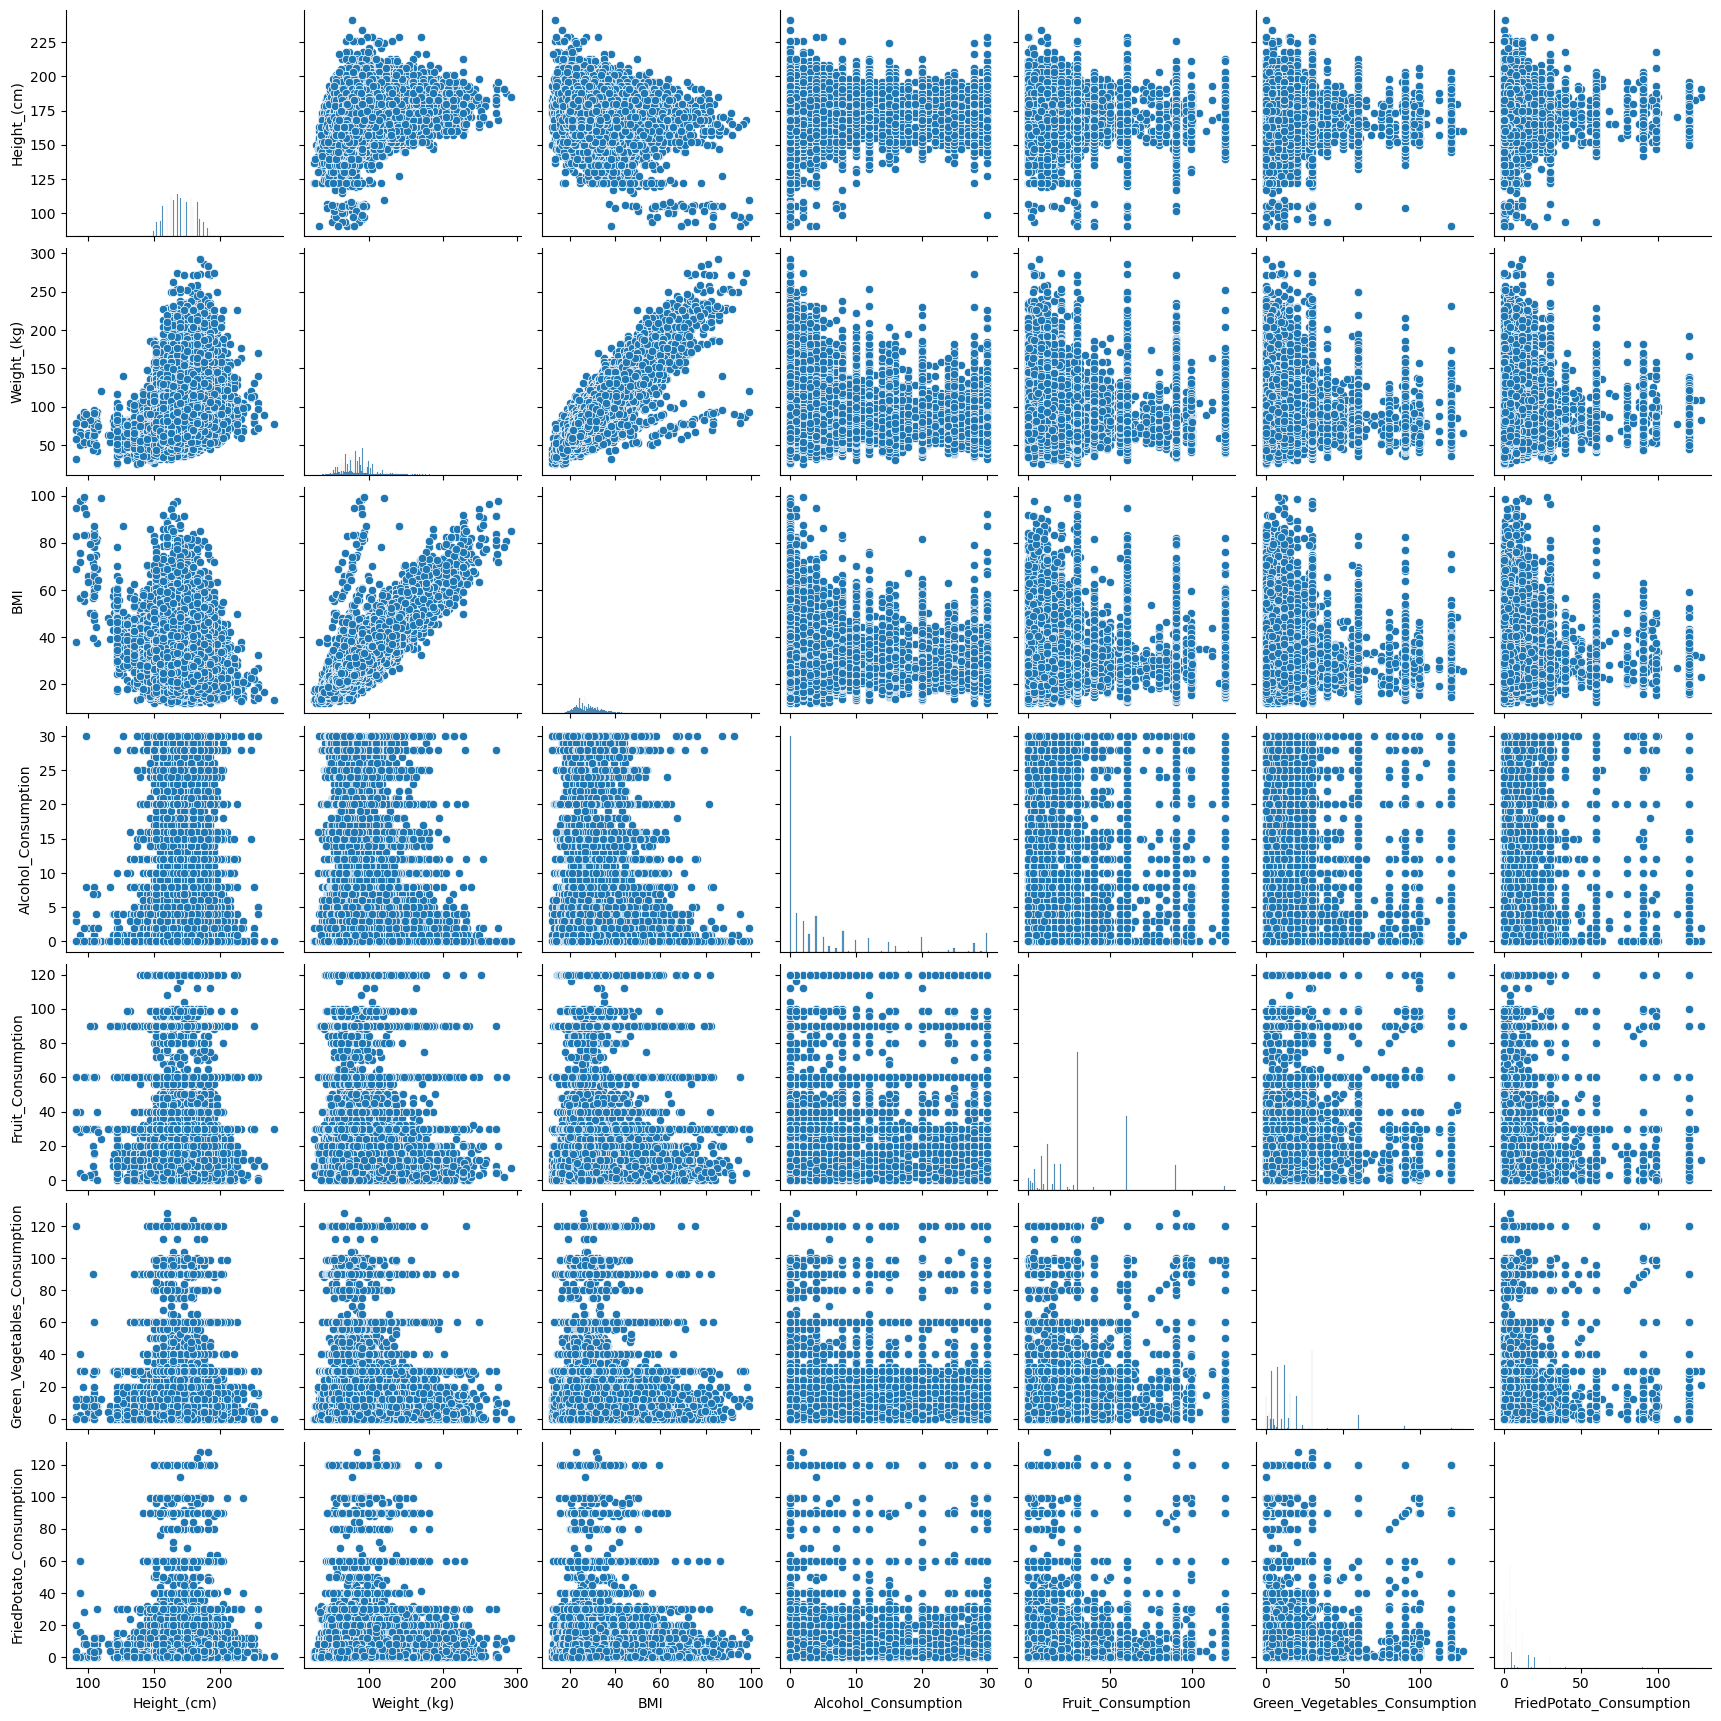

In [15]:
sns.pairplot(data)
#disterbution of data is clear in some cases

In [24]:
sns.heatmap(data.corr(), annot=True)

AttributeError: 'NoneType' object has no attribute 'corr'

In [ ]:
Heart_Disease = data.Heart_Disease.value_counts()
Skin_Cancer = data.Skin_Cancer.value_counts()
Other_Cancer = data.Other_Cancer.value_counts()
Depression = data.Depression.value_counts()
Diabetes = data.Diabetes.value_counts()
#although below data were in numbers in above codes, but lets visualize them, to make better understand
#specially for non-technicals
fig = plt.figure(figsize=(20,10), dpi=1600)
ax1 = plt.subplot2grid((3,2),(0,0))
plt.pie(Heart_Disease, labels=Heart_Disease.index, autopct='%.1f%%')
plt.title('The percentage of Respondents Having Coronary Heart Disease')


ax1 = plt.subplot2grid((3,2),(0,1))
plt.pie(Skin_Cancer, labels=Skin_Cancer.index, autopct='%.1f%%')
plt.title('The percentage of Respondents Having Skin Cancer')


ax1 = plt.subplot2grid((3,2),(1,0))
plt.pie(Other_Cancer, labels=Other_Cancer.index, autopct='%.1f%%')
plt.title('The percentage of Respondents Having any other types of cancer')


ax1 = plt.subplot2grid((3,2),(1,1))
plt.pie(Depression, labels=Depression.index, autopct='%.1f%%')
plt.title('The percentage of Respondents Having a Depressive disorder')


ax1 = plt.subplot2grid((3,2),(2,0))
plt.pie(Diabetes, labels=Diabetes.index, autopct='%.1f%%')
plt.title('The percentage of Respondents Having a Diabetes')


ax1 = plt.subplot2grid((3,2),(2,1))
plt.pie(Arthritis, labels=Arthritis.index, autopct='%.1f%%')
plt.title('The percentage of Respondents Having an Arthritis')

plt.tight_layout(pad=2);



In [18]:
from sklearn.preprocessing import LabelEncoder
#lets change categorical values to numerical values so model can understand them, I will try to
#make the order of data to make sense for model.
def label_encode_dataframe(data):
    for column in data.select_dtypes(include=['object']):
        le = LabelEncoder()
        encoded_values = le.fit_transform(data[column])
        
        if column == 'Age_Category':
            label_mapping = {
                '18-24': 1,
                '25-29': 2,
                '30-34': 3,
                '35-39': 4,
                '40-44': 5,
                '45-49': 6,
                '50-54': 7,
                '55-59': 8,
                '60-64': 9,
                '65-69': 10,
                '70-74': 11,
                '75-79': 12,
                '80+': 13
            }
            data[column] = data[column].map(label_mapping)
        elif column == 'Diabetes':
            label_mapping = {
                'No': 0,
                'No, pre-diabetes or borderline diabetes': 1,
                'Yes': 4,
                'Yes, but female told only during pregnancy': 3
            }
            data[column] = data[column].map(label_mapping)
        elif column == 'Checkup':
            label_mapping = {
                '5 or more years ago': 1,
                'Never': 0,
                'Within the past 2 years': 3,
                'Within the past 5 years': 2,
                'Within the past year': 4
            }
            data[column] = data[column].map(label_mapping)
        elif column == 'General_Health':
            label_mapping = {
                'Excellent': 4,
                'Fair': 1,
                'Good': 2,
                'Poor': 0,
                'Very Good': 3
            }
            data[column] = data[column].map(label_mapping)
        else:
            data[column] = encoded_values
            unique_categories = le.classes_
            if len(unique_categories) > 2:
                label_mapping = dict(zip(unique_categories, encoded_values))
                print(f"Label Encoding Mapping for '{column}': {label_mapping}")
            else:
                label_mapping = dict(zip(unique_categories, [0, 1]))
                print(f"Label Encoding Mapping for '{column}': {label_mapping}")


In [19]:
data=label_encode_dataframe(data)
data

Label Encoding Mapping for 'Exercise': {'No': 0, 'Yes': 1}
Label Encoding Mapping for 'Heart_Disease': {'No': 0, 'Yes': 1}
Label Encoding Mapping for 'Skin_Cancer': {'No': 0, 'Yes': 1}
Label Encoding Mapping for 'Other_Cancer': {'No': 0, 'Yes': 1}
Label Encoding Mapping for 'Depression': {'No': 0, 'Yes': 1}
Label Encoding Mapping for 'Arthritis': {'No': 0, 'Yes': 1}
Label Encoding Mapping for 'Sex': {'Female': 0, 'Male': 1}
Label Encoding Mapping for 'Smoking_History': {'No': 0, 'Yes': 1}


In [22]:
from sklearn.preprocessing import MinMaxScaler
#lets normalize data to make the ML faster and more accurate 
def normalize_dataframe(data):
    scaler = MinMaxScaler()
    normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    return normalized_data


In [29]:
data = np.nan

# Assign the data to an array
data = np.array(data)

# Check if data is an array
if not isinstance(data, np.ndarray):
    raise ValueError("data must be an array")

# Reshape the data to be a 2D array
data = data.reshape(1, -1)
normalize_dataframe(data)

C:\Users\moham\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\moham\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [23]:

def balance_dataframe(data, target_column):
    counts = data[target_column].value_counts()
    min_count = counts.min()
    
    balanced_data = pd.DataFrame()
    
    for category in counts.index:
        category_data = data[data[target_column] == category]
        balanced_data = pd.concat([balanced_data, category_data.sample(min_count, replace=True)])
    
    return balanced_data


In [24]:
balanced_data=balance_dataframe(data,'Arthritis')
balanced_data.shape

(202126, 19)

In [25]:
from sklearn.model_selection import train_test_split
y=balanced_data['Arthritis']
x=balanced_data.drop('Arthritis', axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.25, shuffle=True)
print('X_train.shape:',X_train.shape)
print('X_test.shape:',X_test.shape)
print('Y_train.shape:',Y_train.shape)
print('Y_test.shape:',Y_test.shape)

X_train.shape: (151594, 18)
X_test.shape: (50532, 18)
Y_train.shape: (151594,)
Y_test.shape: (50532,)


In [26]:
import tensorflow as tf

output_size=2
hidden_layer_size=175
DL_model=tf.keras.Sequential([tf.keras.layers.Dense(hidden_layer_size, activation='LeakyReLU'),
                           tf.keras.layers.Dense(hidden_layer_size, activation='selu'), 
                           tf.keras.layers.Dense(hidden_layer_size, activation='relu'), 
                           tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                           tf.keras.layers.Dense(400, activation='relu'),
                           tf.keras.layers.Dense(30, activation='selu'),
                           tf.keras.layers.Dense(output_size, activation='softmax')
    
])
DL_model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy', metrics=['accuracy'] )

batch_size=175
max_epochs=30
early_stop=tf.keras.callbacks.EarlyStopping(patience=6)
DL_model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          epochs=max_epochs,
          callbacks=[early_stop],
          verbose=1)

Epoch 1/30
867/867 [==============================] - 3s 3ms/step - loss: 0.6088 - accuracy: 0.6796
Epoch 2/30
867/867 [==============================] - 2s 3ms/step - loss: 0.5619 - accuracy: 0.7092
Epoch 3/30
867/867 [==============================] - 3s 3ms/step - loss: 0.5602 - accuracy: 0.7091
Epoch 4/30
867/867 [==============================] - 3s 3ms/step - loss: 0.5567 - accuracy: 0.7119
Epoch 5/30
867/867 [==============================] - 2s 3ms/step - loss: 0.5551 - accuracy: 0.7127
Epoch 6/30
867/867 [==============================] - 3s 3ms/step - loss: 0.5552 - accuracy: 0.7129
Epoch 7/30
867/867 [==============================] - 3s 3ms/step - loss: 0.5549 - accuracy: 0.7137
Epoch 8/30
867/867 [==============================] - 3s 3ms/step - loss: 0.5538 - accuracy: 0.7136
Epoch 9/30
867/867 [==============================] - 3s 3ms/step - loss: 0.5538 - accuracy: 0.7142
Epoch 10/30
867/867 [==============================] - 3s 3ms/step - loss: 0.5527 - accuracy: 0.7149

In [29]:
test_accuracy=DL_model.evaluate(X_test, Y_test)


1580/1580 [==============================] - 2s 1ms/step - loss: 0.5505 - accuracy: 0.7196


In [31]:
print(test_accuracy)
#so model is not overfited because the test and train accuracy data do not have much differences.
#on the other hand, I used callback method to prevent overfitting during training data


[0.5504658818244934, 0.7196232080459595]


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

# Create an instance of the Extra Trees classifier
tree_model = ExtraTreesClassifier()

# Fit the model on the training data
tree_model.fit(X_train, Y_train)

Y_pred = tree_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8244676640544606


In [37]:
#sometimes classic ML algorithms work much better than DL
#lets see details to have a vivid understanding of importance of each column
feature_importances = tree_model.feature_importances_

# Print the feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i + 1}: {importance}")

Feature 1: 0.06081591113048962
Feature 2: 0.030441233523187887
Feature 3: 0.01444604716735488
Feature 4: 0.013755019445734736
Feature 5: 0.012563431113175025
Feature 6: 0.012709820007100947
Feature 7: 0.016192936908519476
Feature 8: 0.021025374423295617
Feature 9: 0.012324263014643346
Feature 10: 0.17326399129715647
Feature 11: 0.08720744211803867
Feature 12: 0.0967563631993287
Feature 13: 0.10219318995670973
Feature 14: 0.016666552706247225
Feature 15: 0.07332608359953184
Feature 16: 0.0816747299818317
Feature 17: 0.08719781284643427
Feature 18: 0.08743979756121996


In [40]:
weights = DL_model.get_weights()
weights

[array([[ 0.59629697, -0.8640535 ,  0.06547134, ...,  0.86655617,
         -0.3916372 , -0.7956366 ],
        [-0.3025804 ,  0.20675522, -0.2203174 , ..., -0.618984  ,
          0.32215142,  0.35455033],
        [-0.24774148, -0.02549731, -0.02968848, ...,  0.15906009,
          0.07201452,  0.15112768],
        ...,
        [-0.0662231 ,  0.08635068, -0.13758095, ...,  0.08045675,
         -0.04792582,  0.11114137],
        [-0.01743946, -0.11020908, -0.12545899, ...,  0.04337179,
         -0.00106947,  0.11388142],
        [ 0.01834287,  0.09835791,  0.09576374, ..., -0.21918821,
          0.03444955, -0.12107456]], dtype=float32),
 array([ 3.33435908e-02, -1.30018845e-01, -7.70161226e-02, -2.98337322e-02,
         3.91890258e-02, -4.87028994e-02, -9.48365629e-02, -1.69907585e-01,
         2.67513879e-02, -4.29834165e-02,  2.48430413e-03,  2.39883624e-02,
        -1.28909752e-01, -7.54509121e-03, -2.51736529e-02,  5.81216961e-02,
        -8.11507553e-02,  2.30076723e-02, -4.84427027e

In [45]:
dictionary = dict(zip(columns, feature_importances))

# Print the dictionary
print(dictionary)

{'General_Health': 0.012324263014643346, 'Checkup': 0.012563431113175025, 'Exercise': 0.012709820007100947, 'Heart_Disease': 0.013755019445734736, 'Skin_Cancer': 0.01444604716735488, 'Other_Cancer': 0.016192936908519476, 'Depression': 0.016666552706247225, 'Diabetes': 0.021025374423295617, 'Arthritis': 0.030441233523187887, 'Sex': 0.06081591113048962, 'Age_Category': 0.07332608359953184, 'Height_(cm)': 0.0816747299818317, 'Weight_(kg)': 0.08719781284643427, 'BMI': 0.08720744211803867, 'Smoking_History': 0.08743979756121996, 'Alcohol_Consumption': 0.0967563631993287, 'Fruit_Consumption': 0.10219318995670973, 'Green_Vegetables_Consumption': 0.17326399129715647}


In [47]:
importance_of_each_feature = pd.DataFrame(dictionary.items(), columns=['columns', 'feature_importances'])
importance_of_each_feature

,columns,feature_importances
0,General_Health,0.012324
1,Checkup,0.012563
2,Exercise,0.012710
3,Heart_Disease,0.013755
4,Skin_Cancer,0.014446
5,Other_Cancer,0.016193
6,Depression,0.016667
7,Diabetes,0.021025
8,Arthritis,0.030441
9,Sex,0.060816


In [49]:
df_sorted = importance_of_each_feature.sort_values('feature_importances', ascending=False)
df_sorted

,columns,feature_importances
17,Green_Vegetables_Consumption,0.173264
16,Fruit_Consumption,0.102193
15,Alcohol_Consumption,0.096756
14,Smoking_History,0.087440
13,BMI,0.087207
12,Weight_(kg),0.087198
11,Height_(cm),0.081675
10,Age_Category,0.073326
9,Sex,0.060816
8,Arthritis,0.030441


In [50]:
#as you can see, lifestyle has the most important effect on having a cardiovascular disease 
#Take care of your health by eating green and fruit and AVOID DRINKING ALCOHOL
#there is only one step ahead: saving models

In [57]:
import joblib
#I will save the best performancing model/ any comments or questions, reach my linkedin (mohammad sadegh abbaszadeh)
#or my github : github.com/msabbaszadeh
model = tree_model

# Save the model to a file
joblib.dump(model, r'D:\data science\data set\cardiovascular\model.pkl')
#C U later :)

['D:\\data science\\data set\\cardiovascular\\model.pkl']